#Proyecto Semestral: Hito 2

##CC5206 Semestre de Primavera 2020

Alumnos: Joaquin Cruz, Ignacio Dassori, Pablo Muñoz, Cristóbal Torres

Profesores: Felipe Bravo, Hernán Sarmiento

Fecha de entrega: 16 de octubre de 2020

## Introducción

 Estados Unidos se encuentra dentro de los países con mayor tasa de muertes por mano de la policía al año. En comparación con el resto de países que encabezan la lista, el resto todos presentan o bien conflictos internos (Venezuela y Siria) o políticas severas con respecto al uso de fuerza letal en contra de criminales (Brasil y las Filipinas). Resulta entonces interesante analizar el perfil de las víctimas en los Estados Unidos. Poder ver también si influyen las características que se pueden notar a simple vista en el desenlace de la situación, como si la víctima está armada, si intenta darse a la fuga, la raza a la que pertenece o su género, junto a alguna correlación entre los atributos.

 Para la realización del hito 2 se cambió el dataset por uno más completo que aborda el mismo tipo de datos. Este nuevo dataset contiene por sobre 3000 instancias más que el original y nuevos atributos como la geografía del lugar en que tomo lugar el suceso, el arma que cargaba la víctima al momento de confrontar a la policía y si el policía en cuestión fue acusado de un delito posteriormente. El nuevo dataset contiene un total de 8629 filas y 29 columnas. Además de este dataset se trabajó con dos adicionales a modo de enriquecer el análisis. Estos datos corresponden a la tasa de desempleo y tasa de crímenes violentos por estado.

Los datos fueron extraídos de las siguientes direcciones.
* https://mappingpoliceviolence.org/  (Dataset del proyecto)
* https://ucr.fbi.gov/crime-in-the-u.s  (Índice de crimenes por zona)
* https://datosmacro.expansion.com/paro/  (Índice de desempleo por zona)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel("https://mappingpoliceviolence.org/s/MPVDatasetDownload.xlsx")
unemploiment = pd.read_csv("https://raw.githubusercontent.com/TinSlim/Perfil-An-lisis-de-v-ctimas-fatales-por-acci-n-policial-en-los-Estados-Unidos/main/desempleo_new.csv",
                           delimiter=";")
crime_index = pd.read_csv("https://raw.githubusercontent.com/TinSlim/Perfil-An-lisis-de-v-ctimas-fatales-por-acci-n-policial-en-los-Estados-Unidos/main/Violent_Crime_rate.csv",
                          delimiter=";")

!pip3 install plotly --upgrade
import plotly


Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.13.0)


## Limpieza de Datos

Primero es importante ver la cantidad de datos que trae el dataset y además revisar cuántos valores nulos (NaN) hay en este mismo.

In [ ]:
print("Cantidad de Datos: ", len(data))
print("Cantidad de nulos totales: ",data.isnull().sum().sum(), "\n")

print(data.head())

Cantidad de Datos:  8629
Cantidad de nulos totales:  24399 

         Victim's name Victim's age  ... MPV ID Fatal Encounters ID
0       Pedro Martinez           66  ...    NaN                 NaN
1         James Horton           42  ...    NaN                 NaN
2  Dustin James Acosta           28  ...    NaN                 NaN
3          Javon Brice           39  ...    NaN                 NaN
4      Joshua D. Evans           32  ...    NaN                 NaN

[5 rows x 29 columns]


Para comenzar la limpieza de datos se eliminan los atributos que no resultan relevantes para el análisis e interpretación de datos que se llevará a cabo y aquellos cuya cantidad de datos nulos sea muy elevada. Los atributos no relevantes son "Street Adress of Incident", Victims's name", "URL of image of victim", "WaPo ID", "Fatal Encounters ID", "MPV ID", "Agency respondsible for death", "Link to news article or photo of official document", "Zipcode", "ORI Agenct Identifier" y "A brief description of the circumstances surrounding the death". Los atributos "Off-Duty Killing" y "Body Camera" si bien son interesantes de analizar contienen una gran cantidad de datos nulos, por lo cual no serán considerados. Por último, el atributo "Unarmed/Did Not Have an Actual Weapon" especifica si la persona se encontraba armada, pero la existencia de otro atributo que especifica el arma portada o la ausencia de una lo convierte en redundante. Esto mismo se aplica para los atributos "Official disposition of death" y "Criminal charges", ya que el segundo es una manera más compacta de describir la información presentada por el primero.

Para reducir el ruido del dataset se eliminaron datos ambigüos o mal ingresados, como valores "Unknown" o edades que incluían letras. También se eliminaron datos de muy baja frecuencia que podrían ser considerados como ruido o poco representativos. Estos fueron, por ejemplo, causas de muerte poco comunes con menos de 10 instancias en todo el dataset.

In [ ]:
tamanho_inicial = len(data)

print(f"Tamaño Inicial: {tamanho_inicial}")
data_cleaned = data.drop(["Street Address of Incident","Victim's name","URL of image of victim",
                          "WaPo ID (If included in WaPo database)","Fatal Encounters ID","MPV ID",
                          "Agency responsible for death","Link to news article or photo of official document",
                          "Zipcode","ORI Agency Identifier (if available)","A brief description of the circumstances surrounding the death",
                          "Off-Duty Killing?", "Body Camera (Source: WaPo)","Unarmed/Did Not Have an Actual Weapon", "Official disposition of death (justified or other)"
                          ],axis=1)

data_cleaned = data_cleaned.dropna()
data_cleaned = data_cleaned.rename(columns = {"Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )":"geography",
                                              "Victim's age":"age",
                                              "Victim's gender":"gender",
                                              "Date of Incident (month/day/year)":"Date",
                                              "Official disposition of death (justified or other)": "Disposition of death",
                                              "Victim's race":"race",
                                              "Cause of death":"manner_of_death",
                                              "State":"state",
                                              "Fleeing (Source: WaPo)":"flee",
                                              "Alleged Threat Level (Source: WaPo)":"threat_level",
                                              "Symptoms of mental illness?":"mental_ilness",
                                              "Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)":"weapon",
                                              "Disposition of death":"disposition",
                                              "Criminal Charges?":"criminal_charges",
                                              "County":"county",
                                              "City":"city"})

data_cleaned = data_cleaned[data_cleaned['age'] != 'Unknown']
data_cleaned = data_cleaned[data_cleaned['age'] != '40s']

data_cleaned = data_cleaned[data_cleaned['gender'] != 'Unknown']
data_cleaned = data_cleaned[data_cleaned['gender'] != 'Transgender']
data_cleaned = data_cleaned[data_cleaned['gender'] != 'Male ']

data_cleaned["flee"] = data_cleaned["flee"].str.lower()

data_cleaned = data_cleaned[data_cleaned['race'] != 'Unknown race']
data_cleaned = data_cleaned[data_cleaned['race'] != 'Unknown Race']

data_cleaned = data_cleaned[(data_cleaned['manner_of_death'] != 'Gunshot, Bean Bag Gun') & (data_cleaned['manner_of_death'] != 'Gunshot, Beanbag Gun') &
                            (data_cleaned['manner_of_death'] != 'Gunshot, Pepper Spray') & (data_cleaned['manner_of_death'] != 'Gunshot, Police Dog') &
                            (data_cleaned['manner_of_death'] != 'Gunshot, Unspecified Less Lethal Weapon') & (data_cleaned['manner_of_death'] != 'Other') &
                            (data_cleaned['manner_of_death'] != 'Physical restraint') & (data_cleaned['manner_of_death'] != 'Physical Restraint') &
                            (data_cleaned['manner_of_death'] != 'Bomb') & (data_cleaned['manner_of_death'] != 'Asphyxiated') & 
                            (data_cleaned['manner_of_death'] != 'Beaten') & (data_cleaned['manner_of_death'] != 'Pepper Spray') &
                            (data_cleaned['manner_of_death'] != 'Gunshot, Vehicle')] 





data_cleaned = data_cleaned.replace(to_replace="Gunshot, Taser, Baton", value="Gunshot, Taser")
data_cleaned = data_cleaned.replace(to_replace="Taser", value="Tasered")

cambiar=[]
for p in data_cleaned["criminal_charges"]:
  if "charged" in p.lower() and p.lower() not in cambiar:
    cambiar.append(p)
for p in cambiar:
  data_cleaned = data_cleaned.replace(to_replace=p, value="Charged")

tamanho_final = len(data_cleaned)
print(f"Tamaño Final: {tamanho_final}")


print(data_cleaned.head())
data_cleaned.to_excel(r'dataset.xlsx', index = False)
#print("Tamaño pre procesado: ",tamanho_inicial,"\nTamaño post procesado: ", tamanho_final,"\n")
#print("Diferencia: ",tamanho_inicial-tamanho_final)
#print("Porcentaje eliminado: ",(int(100-((tamanho_final*100)/tamanho_inicial))),'%')

Tamaño Inicial: 8629
Tamaño Final: 5091
    age gender   race  ... threat_level         flee geography
10   40   Male  White  ...        other          car  Suburban
12   18   Male  Black  ...        other  not fleeing  Suburban
13   16   Male  Black  ...        other          car  Suburban
17   37   Male  Black  ...       attack          car     Urban
25   25   Male  Black  ...       attack  not fleeing     Urban

[5 rows x 14 columns]


Si bien se descartó un 41% de los datos totales, se sigue contando con un volumen de datos razonablemente grande para realizar un análisis.

In [ ]:
data_cleaned.head(4)

,age,gender,race,Date,city,state,county,manner_of_death,criminal_charges,mental_ilness,weapon,threat_level,flee,geography
10,40,Male,White,2020-11-14,Cantonment,FL,Escambia,Gunshot,No known charges,No,vehicle,other,car,Suburban
12,18,Male,Black,2020-11-13,Cocoa,FL,Brevard,Gunshot,No known charges,No,undetermined,other,not fleeing,Suburban
13,16,Male,Black,2020-11-13,Cocoa,FL,Brevard,Gunshot,No known charges,No,undetermined,other,car,Suburban
17,37,Male,Black,2020-11-11,Oklahoma City,OK,Oklahoma,Gunshot,No known charges,No,gun,attack,car,Urban


Después de la limpieza obtenemos un dataset con 5091 datos y 14 atributos. Posteriormente se agregaron los datos correspondientes a los datasets de tasas de criminalidad y desempleo, lo que involucró un trabajo sobre estos para poder incluirlos como nuevos atributos. En ambos casos las tasas se encontraban ordenadas por fecha y estado, siendo las de desempleo mensuales y las de criminalidad anuales. Para poder concatenar estas tablas primero se modificaron las fechas de las muertes para solo incluir mes y año, y se creó una nueva columna "key" que mezcla la fecha y estado del incidente. Esta nueva columna se agrega también a copias de los datasets "unemploiment" y "crime_index", y estas se concatenan con el dataset a trabajar. La columna "key" ya no es necesaria así que se elimina y se renombraron ciertos atributos para tener coherencia con el resto.

Es importante mencionar que las cifras de tasa de criminalidad por estado en los Estados Unidos para el año 2020 aún no se han hecho públicas por la página oficial del FBI, fuente en la cual se obtuvieron los datos para años pasados. Para este análisis se consideraron para el 2020 los mísmos índices de criminalidad de finales del 2019.

In [ ]:
data_without_day = data_cleaned.copy()
data_without_day['Date'] = data_without_day['Date'].apply(lambda x: x.strftime('%Y-%m'))
data_without_day['key'] = data_without_day[['Date', 'state']].apply(lambda x: ''.join(x), axis=1)

unemploiment_ch = unemploiment.rename(columns = {"date_my":"Date"})
unemploiment_ch['key'] = unemploiment_ch[['Date', 'state']].apply(lambda x: ''.join(x), axis=1)
unemploiment_ch = unemploiment_ch.drop(["Date","state"],axis = 1)


crime_index_ch = crime_index
crime_index_ch['key'] = crime_index[['Date', 'State']].apply(lambda x: ''.join(x), axis=1)
crime_index_ch = crime_index_ch.drop(["Date","State"],axis = 1)


                                       
concatenate = pd.merge(data_without_day,unemploiment_ch, on = 'key')

concatenate = pd.merge(concatenate,crime_index_ch, on = 'key')
concatenate = concatenate.drop(["key"],axis = 1)
concatenate = concatenate.rename(columns = {"coef":"unemployment_rate",
                                            "Violent Crime Rate":"crime_rate",
                                            "Date":"date"})
data_cleaned = concatenate

concatenate.head(5)

,age,gender,race,date,city,state,county,manner_of_death,criminal_charges,mental_ilness,weapon,threat_level,flee,geography,unemployment_rate,crime_rate
0,57,Male,White,2020-06,Paducah,KY,McCracken,Gunshot,No known charges,No,undetermined,undetermined,car,Suburban,0.043,217.1
1,48,Male,White,2020-06,Hazleton,PA,Luzerne,Gunshot,No known charges,No,gun,attack,car,Urban,0.130,306.4
2,68,Male,White,2020-06,Kettering,OH,Montgomery,Gunshot,No known charges,Yes,gun,attack,not fleeing,Suburban,0.109,293.2
3,40,Female,White,2020-06,Port Richey,FL,Pasco,Gunshot,No known charges,Unknown,gun,attack,foot,Suburban,0.104,378.4
4,27,Male,White,2020-06,Auburndale,FL,Polk,Gunshot,No known charges,No,gun,attack,not fleeing,Suburban,0.104,378.4


Aqui se tiene una vision preliminar de los datos que se trabajarán, son 5091 datos con 16 atributos: 

* age (int)

* gender (categoric)

* race (categoric)

* date (año-mes-dia)

* city (categoric)

* state (categoric)

* county (categoric)

* manner_of_death (categoric)

* criminal_charges (categoric)

* mental_ilness (categoric)

* weapon (categoric)

* threat_level (categoric)

* flee (categoric)

* geography (categoric)

* unemployment_rate (float)

* crime_rate (float)

# Análisis de datos

En la siguiente sección se presentan distintos gráficos generados a partir de los datos tras su limpieza. En base a estos se realiza una exploración inicial de la distribución de los datos en base a sus atributos. 

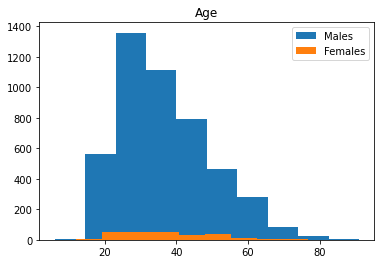

Media:  36.47
Desviación:  12.8
Mediana:  34.0
Moda:  25


In [ ]:
datos = data_cleaned

males = datos[datos['gender'] == 'Male']
females = datos[datos['gender'] == 'Female']

age = datos['age']
plt.hist(males['age'], label="Males")
plt.hist(females['age'], label="Females")
plt.legend()
plt.title("Age")
plt.show()

print("Media: ",round(age.mean(), 2))
print("Desviación: ", round(age.std(), 2))
print("Mediana: ",age.median())
print("Moda: ",age.mode()[0])


El gráfico de edad nos muestra que hay una gran diferencia entre la cantidad de mujeres y hombres en el dataset, además se observa que hay un gran incremento en la cantidad de personas involucradas en disparos policiales a partir de los 23-24 años aprox para el caso de los hombres, siendo este el punto de mayor concentración de los datos para luego ir descendiendo a medida que crece la edad.
En el caso de las mujeres la cantidad de datos se mantiene bastante estable en el rango de edad de 20-40 años, para luego ir descendiendo a medida que crece la edad

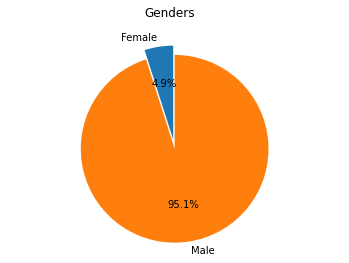

In [ ]:
gender = datos.groupby('gender').size()
gender = gender.to_dict()


labels = gender.keys()

total = 0
for p in gender.values():
  total+=p
porcentajes = []
for p in gender.values():
  porcentajes.append(p/total)
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
fig1.suptitle('Genders')
ax1.pie(porcentajes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

En el grafo se observa con mayor claridad la gran diferencia entre las víctimas hombres y mujeres. Esto podría deberse a una sobrerrepresentación de hombres en el dataset, pero dada la gran cantidad y origen de los datos es razonable concluir que este no es el caso.

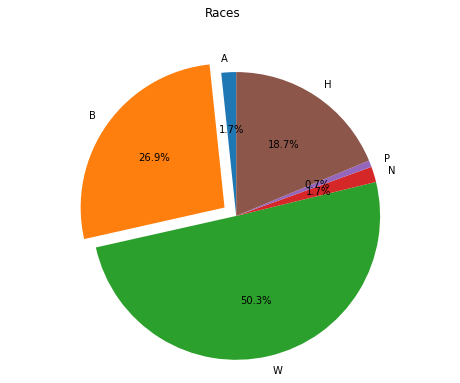

In [ ]:
race = datos.groupby('race').size()
race = race.to_dict()

race["A"] = race.pop("Asian")
race["B"] = race.pop("Black")
race["W"] = race.pop("White")
race["N"] = race.pop("Native American")
race["P"] = race.pop("Pacific Islander")
race["H"] = race.pop("Hispanic")


labels = race.keys()

total = 0
for p in race.values():
  total+=p
porcentajes = []
for p in race.values():
  porcentajes.append(p/total)
explode = (0, 0.1,0,0,0,0)  


fig1, ax1 = plt.subplots(figsize=(8,6))
fig1.suptitle('Races')
ax1.pie(porcentajes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

Las etiquetas corresponden a las razas de las personas que fueron disparadas por la policia, siendo

W: White

B: Black

A: Asian

N: Native American

H: Hispanic

P: Pacific Islander

Se observa que en la mayoría de los casos las personas disparadas son de raza W, seguido de B y H, mientras tanto las otras razas tienen representación considerablemente menor con respecto a las otras en los datos

In [ ]:
datos.groupby('manner_of_death').size()

manner_of_death
Gunshot           4625
Gunshot, Taser     224
Tasered             73
Vehicle             12
dtype: int64

Text(0.5, 0.98, 'Manner of death')

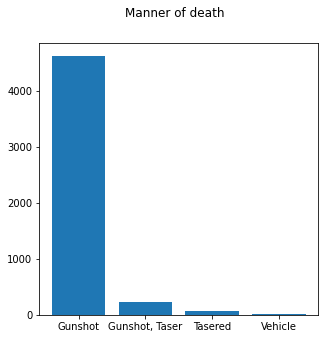

In [ ]:
manner_of_death = datos.groupby('manner_of_death').size()
manner_of_death = manner_of_death.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axs.bar(manner_of_death.keys(),manner_of_death.values())
fig.suptitle('Manner of death')


La manera en que las víctimas murieron fueron mayoritariamente sólo por disparos de armas de fuego, pero también hubo una cantidad no despreciable de personas que murieron por causa de disparos y arma de electrochoque, los casos de muerte por solo taser y por solo vehiculos son mínimos en comparacación a los otros.

Text(0.5, 0.98, 'State where the shot happened')

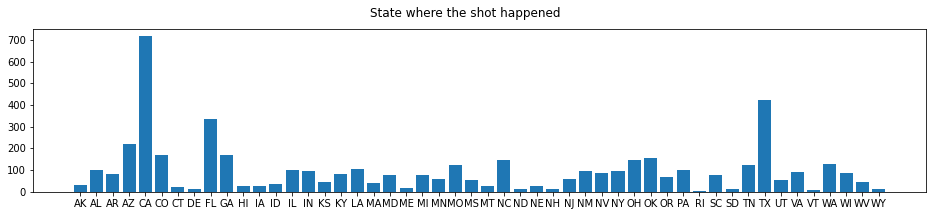

In [ ]:
state = datos.groupby('state').size()
state = state.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(16, 3), sharey=True)
axs.bar(state.keys(),state.values())
fig.suptitle('State where the shot happened')

Las etiquetas corresponden a la abreviacion de dos letras del codigo postal de cada estado, este gráfico muestra donde ocurrieron los disparos de la policia,
siendo CA=California y Tx=Texas los estados donde ocurren más muertes por disparos de policias

Text(0.5, 0.98, 'Fleeing attempt')

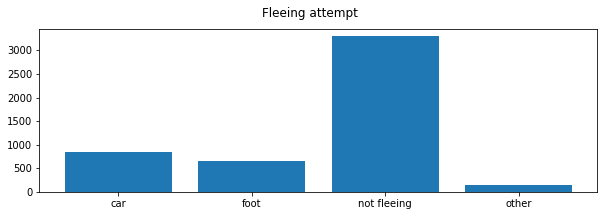

In [ ]:
flee = datos.groupby('flee').size()
flee = flee.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(10, 3), sharey=True)
axs.bar(flee.keys(),flee.values())
fig.suptitle('Fleeing attempt')

Este grafico muestra si hubo un intento de escapar por parte de la persona de la policia, y de ser asi que medio uso para esto, se observa que la mayoría de las personas no intento escapar al momento del encuentro con la policia y que los restantes escaparon mayoritariamente por auto o a pie.

Text(0.5, 0.98, 'Threat level')

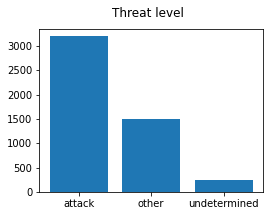

In [ ]:
threat_level= datos.groupby('threat_level').size()
threat_level = threat_level.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(4, 3), sharey=True)
axs.bar(threat_level.keys(),threat_level.values())
fig.suptitle('Threat level')

El gráfico muestra el nivel de amenaza presentado por la víctima. En la mayoría de los casos este fue calificado como "ataque", seguido de "otro" y por último una pequeña cantidad no determinada.

Text(0.5, 0.98, 'criminal_charges')

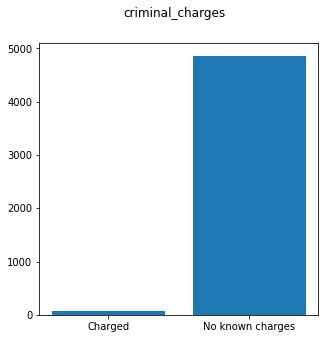

In [ ]:
criminal_charges = datos.groupby('criminal_charges').size()
criminal_charges = criminal_charges.to_dict()


fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axs.bar(criminal_charges.keys(),criminal_charges.values())
fig.suptitle('criminal_charges')

La mayoría de los casos de disparos policiales terminan sin cargos conocidos para el policía

In [ ]:
from urllib.request import urlopen
import json
%pip install -U plotly
import plotly.express as px
import requests
import urllib

# cargamos el geojson de counties
with urlopen("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json") as response:
   counties_geojson = json.load(response)

# cargamos el geojson de counties
with urlopen("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json") as response:
   state_geojson = json.load(response)

# cargamos el csv con los FIPS codes
state_fips = pd.read_csv("https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_fips_master.csv")
state_fips = state_fips.drop(["state_name","long_name","sumlev",
                          "region", "division", "state", "region_name", "division_name"],axis=1)
state_fips = state_fips.rename(columns = {"state_abbr":"state"})
for p in range(10):
  state_fips = state_fips.replace(to_replace=p, value="0"+str(p))

datos = pd.merge(datos, state_fips, on='state')
data_state_fips_count = datos.groupby('fips', as_index=False).count()  # todas las columnas, menos fips, ahora tienen la misma info
data_state_fips_count['Cantidad de Casos']=data_state_fips_count['date']  # así que creamos una que tenga un nombre representativo


Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.13.0)


In [ ]:
# Y Graficamos
# -- FIPS:State
fig = px.choropleth(data_state_fips_count, geojson=state_geojson, locations='fips', color='Cantidad de Casos',
                           color_continuous_scale="Viridis",
                           range_color=(0, 716),
                           scope="usa"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Este mapa representa la densidad de víctimas por estado en los Estados Unidos por medio de un código de colores.

# Preguntas y Problemas:

A partir de la motivación original y la exploración del dataset presentada anteriormente, se formulan las siguientes preguntas que tratarán de ser respondidas mediante la minería de datos:

* ¿Es posible predecir la raza de una persona muerta por acción policial a partir de los otros atributos?(arbol de decision/knn/svm)

* ¿Es posible predecir la causa de muerte de una persona al realizar un oversampling de los datos?(arbol de decision/knn/svm)

* ¿Existe algun grupo con ciertas características que sea disparado mas frecuentemente por la policía?(Densidad de Clusters)

* ¿Es posible predecir si una persona intenta escapar o no de los policias, y de ser asi que metodo usa basandose en los otros atributos?(arbol de decision/knn/svm)




# Pre-procesamiento

Antes de proceder a contestar las preguntas se realiza un pre-procesamiento de los datos para reemplazar los datos categoricos por valores numericos de las siguiente manera:

##gender
Male:0

Female:1

##race
White:0

Black:1

Asian:2

Native American:3

Hispanic:4

Pacific Islander:5

##city
Se ordenan los nombres de las ciudades por nombre alfabético y se les asigna valores del 0 hacia arriba, siendo el 0 la primera ciudad ordenada alfabeticamente.

##state
Se ordenan los nombres de los estados por nombre alfabético y se les asigna valores del 0 hacia arriba, siendo el 0 el primer estado ordenado alfabeticamente.

##County
Se ordenan los nombres de los condados por nombre alfabético y se les asigna valores del 0 hacia arriba, siendo el 0 el primer condado ordenado alfabeticamente.

##manner_of_death
Gunshot:0

Gunshot, taser:1

tasered:2

vehicle:3

##criminal_charges

no known charges:0

charged:1

##threat_level
attack:0

other:1

undetermined:2

##flee

car:0

foot:1

not fleeing:2

other:3

##Geography

Suburban:0

Urban:1

#Metodolgía


- Para contestar la primera pregunta, utilizando métodos de clasificación como árboles de decisión o un Support Vector Machine, se buscará predecir la raza de una persona que muere por acción policial a través de sus otros atributos. Para ello, se dividirán los datos en entrenamiento y validación, y utilizando la variable raza como etiqueta se implementarán estos algoritmos de clasificación para predecirla.

- Para contestar la pregunta 2, nuevamente utilizando métodos de clasificación, como árboles de decisión y Support Vector Machines, se buscará predecir la causa de muerte de una persona que muere por acción policial. Como la mayoría de las causas de muerte son por una pistola, primero se dividirán en datos de entrenamiento y validación, y luego se hará un oversampling de las otras causas de muerte en los datos de entrenamiento. Una vez hecho esto, utilizando la causa de muerte como etiqueta, se implementarán estos algoritmos de clasificación para predecirla.

- Para contestar la pregunta 3 utilizaremos clasificación no supervizada, formando clusters del tipo jerarquico y particional. Utilizaremos metodos como K-means, clustering jerarquico aglomerativo y DBSCAN. Tambien crearemos clusters sin considerar ciertos atributos para ver si se puede generar una mejor agrupación.Para decidir que metodo genera mejores clusters utilizaremos las metricas de matriz de incidencia, SSE, cohesion y separación, luego con los clusters formados haremos una comparación de las densidades de estos, si existe una diferencia significativa en la densidad de los clusters esto implica que existe un grupo que es disparado mas frecuentemente por los policias.

- Para contestar la pregunta 4, nuevamente utilizando métodos de clasificación, como árboles de decisión y Support Vector Machines, se buscará predecir si una persona intenta escapar o no de los policias, y de escaparse se buscara predecir que metodo usa. Como la mayoría de las personas no escapan, primero se dividirán en datos de entrenamiento y validación, y luego se hará un oversampling de los otros metodos de escape en los datos de entrenamiento. Una vez hecho esto, utilizando el metodo de escape como etiqueta, se implementarán estos algoritmos de clasificación para predecirla.

# Aportes de Cada Integrante:

* Joaquin Cruz:
	* Hito 1: Obtención de datos de estado y condados para el mapa de calor, generación de mapas de calor. Powerpoint.
	* Hito 2: Discusiones sobre limpieza de datos. Copia de datos sin día. Actualización de mapa de calor. Preguntas y Problemas. Metodología para responder las preguntas de investigación.

* Ignacio Dassori:
	* Hito 1: Introducción, descripción de gráficos, y preguntas. Powerpoint.
	* Hito 2: Discusiones sobre limpieza de datos. Actualización de gráficos descriptivos. Búsqueda de tasa de criminalidad, limpieza de esos datos. Preguntas y Problemas.

* Pablo Muñoz:
	* Hito 1: Gráficos y descripción del informe. Powerpoint.
	* Hito 2: Discusiones sobre limpieza de datos. Actualización de descripciones del informe. Actualización de gráficos descriptivos. Preguntas y Problemas. Metodología para responder las preguntas.

* Cristóbal Torres:
	* Hito 1: Página web y limpieza de datos, gráficos, mapas de calor. Powerpoint.
	* Hito 2: Discusiones sobre limpieza de datos. Limpieza efectiva de los nuevos datos. Copia de datos sin día. Actualización de mapa de calor. Búsqueda de y adaptación datos de desempleo por año,mes y estado. Preguntas y Problemas.
